In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf # Import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ESCUELA/IRS/7MO/IA-2/RETO-2


In [ ]:
%cd "/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/RETO-2"
!ls  # show current directory

/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/RETO-2
 1204.csv			  reporte_180725.gsheet
 1204.gsheet			  reporte_DataUnderstanding.ipynb
 inventario_total_180725.csv	 'RETO - Anonimizacion.ipynb'
 inventario_total_180725.gsheet  'Vacas Data Exploration.ipynb'
 reporte_180725.csv


In [ ]:
reporte_data = pd.read_csv("reporte_180725.csv", delimiter=';') # Try changing the delimiter if comma is not correct
reporte_data.head()

,Número del animal,Nombre del grupo,Nombre(s) de selección de animal,#Pezones no encontrados en último ordeño,Días de ordeño en el año en curso 3 - 0,Media diaria de pasos por puerta últimos 7 días,Media MDI últimos 3 días,Ordeño desde 22/03/2025 hasta 18/07/2025,Estado de la reproducción,Días en ordeño,...,Días desde el último control de gest.,Días desde el último secado,Días desde la última inseminación,Días desde la última inseminación fecundante,Días desde próximo celo,Días Desde Último Aborto,Días desde último evento de parto,Días desde el último tratamiento de inseminación artificial temporizada,Días desde el último tratamiento de salud,Días desde el último tratamiento de vacunación
0,6003,VMS 3,Grupo 6,NaN,NaN,10.00,1.34,298,Inseminada,100.0,...,NaN,NaN,14.0,NaN,7.0,NaN,100.0,NaN,9,NaN
1,6036,VMS 3,Grupo 6,NaN,31.0,9.71,1.06,331,Preñada,298.0,...,50.0,NaN,201.0,201.0,NaN,NaN,298.0,NaN,274,"1,091"
2,6178,VMS 3,Grupo 6,1.0,31.0,3.43,2.10,198,Preñada,264.0,...,15.0,NaN,166.0,166.0,NaN,NaN,264.0,NaN,108,NaN
3,6194,VMS 3,Grupo 6,NaN,14.0,11.57,1.09,112,Preñada,255.0,...,1.0,NaN,93.0,93.0,NaN,NaN,255.0,"1,121",228,NaN
4,6191,VMS 3,Grupo 6,NaN,NaN,14.43,1.57,250,Abierta,89.0,...,NaN,NaN,NaN,NaN,NaN,757.0,89.0,NaN,71,NaN


In [ ]:
reporte_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 22 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Número del animal                                                        34 non-null     int64  
 1   Nombre del grupo                                                         34 non-null     object 
 2   Nombre(s) de selección de animal                                         34 non-null     object 
 3   #Pezones no encontrados en último ordeño                                 3 non-null      float64
 4   Días de ordeño en el año en curso 3 - 0                                  22 non-null     float64
 5   Media diaria de pasos por puerta últimos 7 días                          34 non-null     float64
 6   Media MDI últimos 3 días                                                 33 

In [ ]:
df_reporte = reporte_data.drop(["Número del animal", "Nombre del grupo", "Nombre(s) de selección de animal"], axis=1)
df_reporte.head()

,#Pezones no encontrados en último ordeño,Días de ordeño en el año en curso 3 - 0,Media diaria de pasos por puerta últimos 7 días,Media MDI últimos 3 días,Ordeño desde 22/03/2025 hasta 18/07/2025,Estado de la reproducción,Días en ordeño,Días preñada,Días desde el último celo,Días desde el último control de gest.,Días desde el último secado,Días desde la última inseminación,Días desde la última inseminación fecundante,Días desde próximo celo,Días Desde Último Aborto,Días desde último evento de parto,Días desde el último tratamiento de inseminación artificial temporizada,Días desde el último tratamiento de salud,Días desde el último tratamiento de vacunación
0,NaN,NaN,10.00,1.34,298,Inseminada,100.0,NaN,14.0,NaN,NaN,14.0,NaN,7.0,NaN,100.0,NaN,9,NaN
1,NaN,31.0,9.71,1.06,331,Preñada,298.0,201.0,201.0,50.0,NaN,201.0,201.0,NaN,NaN,298.0,NaN,274,"1,091"
2,1.0,31.0,3.43,2.10,198,Preñada,264.0,166.0,166.0,15.0,NaN,166.0,166.0,NaN,NaN,264.0,NaN,108,NaN
3,NaN,14.0,11.57,1.09,112,Preñada,255.0,93.0,93.0,1.0,NaN,93.0,93.0,NaN,NaN,255.0,"1,121",228,NaN
4,NaN,NaN,14.43,1.57,250,Abierta,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757.0,89.0,NaN,71,NaN


##**Tipos de datos de todas las features**

In [ ]:
df_reporte = pd.get_dummies(df_reporte, columns=["Estado de la reproducción"], drop_first=True)
df_reporte.head()

,#Pezones no encontrados en último ordeño,Días de ordeño en el año en curso 3 - 0,Media diaria de pasos por puerta últimos 7 días,Media MDI últimos 3 días,Ordeño desde 22/03/2025 hasta 18/07/2025,Días en ordeño,Días preñada,Días desde el último celo,Días desde el último control de gest.,Días desde el último secado,...,Días desde la última inseminación fecundante,Días desde próximo celo,Días Desde Último Aborto,Días desde último evento de parto,Días desde el último tratamiento de inseminación artificial temporizada,Días desde el último tratamiento de salud,Días desde el último tratamiento de vacunación,Estado de la reproducción_Fresca,Estado de la reproducción_Inseminada,Estado de la reproducción_Preñada
0,NaN,NaN,10.00,1.34,298,100.0,NaN,14.0,NaN,NaN,...,NaN,7.0,NaN,100.0,NaN,9,NaN,False,True,False
1,NaN,31.0,9.71,1.06,331,298.0,201.0,201.0,50.0,NaN,...,201.0,NaN,NaN,298.0,NaN,274,"1,091",False,False,True
2,1.0,31.0,3.43,2.10,198,264.0,166.0,166.0,15.0,NaN,...,166.0,NaN,NaN,264.0,NaN,108,NaN,False,False,True
3,NaN,14.0,11.57,1.09,112,255.0,93.0,93.0,1.0,NaN,...,93.0,NaN,NaN,255.0,"1,121",228,NaN,False,False,True
4,NaN,NaN,14.43,1.57,250,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,757.0,89.0,NaN,71,NaN,False,False,False


In [ ]:
df_reporte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 21 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   #Pezones no encontrados en último ordeño                                 3 non-null      float64
 1   Días de ordeño en el año en curso 3 - 0                                  22 non-null     float64
 2   Media diaria de pasos por puerta últimos 7 días                          34 non-null     float64
 3   Media MDI últimos 3 días                                                 33 non-null     float64
 4   Ordeño desde 22/03/2025 hasta 18/07/2025                                 34 non-null     int64  
 5   Días en ordeño                                                           33 non-null     float64
 6   Días preñada                                                             12 

In [ ]:
df_reporte.isnull().sum()

,0
#Pezones no encontrados en último ordeño,31
Días de ordeño en el año en curso 3 - 0,12
Media diaria de pasos por puerta últimos 7 días,0
Media MDI últimos 3 días,1
Ordeño desde 22/03/2025 hasta 18/07/2025,0
Días en ordeño,1
Días preñada,22
Días desde el último celo,15
Días desde el último control de gest.,19
Días desde el último secado,34


In [ ]:
df_reporte_clean = df_reporte.drop(["#Pezones no encontrados en último ordeño", "Días preñada", "Días desde el último control de gest.", "Días desde el último secado", "Días desde la última inseminación fecundante", "Días desde próximo celo", "Días Desde Último Aborto", "Días desde el último tratamiento de vacunación"], axis=1)
df_reporte_clean.head()

,Días de ordeño en el año en curso 3 - 0,Media diaria de pasos por puerta últimos 7 días,Media MDI últimos 3 días,Ordeño desde 22/03/2025 hasta 18/07/2025,Días en ordeño,Días desde el último celo,Días desde la última inseminación,Días desde último evento de parto,Días desde el último tratamiento de inseminación artificial temporizada,Días desde el último tratamiento de salud,Estado de la reproducción_Fresca,Estado de la reproducción_Inseminada,Estado de la reproducción_Preñada
0,NaN,10.00,1.34,298,100.0,14.0,14.0,100.0,NaN,9,False,True,False
1,31.0,9.71,1.06,331,298.0,201.0,201.0,298.0,NaN,274,False,False,True
2,31.0,3.43,2.10,198,264.0,166.0,166.0,264.0,NaN,108,False,False,True
3,14.0,11.57,1.09,112,255.0,93.0,93.0,255.0,"1,121",228,False,False,True
4,NaN,14.43,1.57,250,89.0,NaN,NaN,89.0,NaN,71,False,False,False


##**Mapa de correlaciones:**

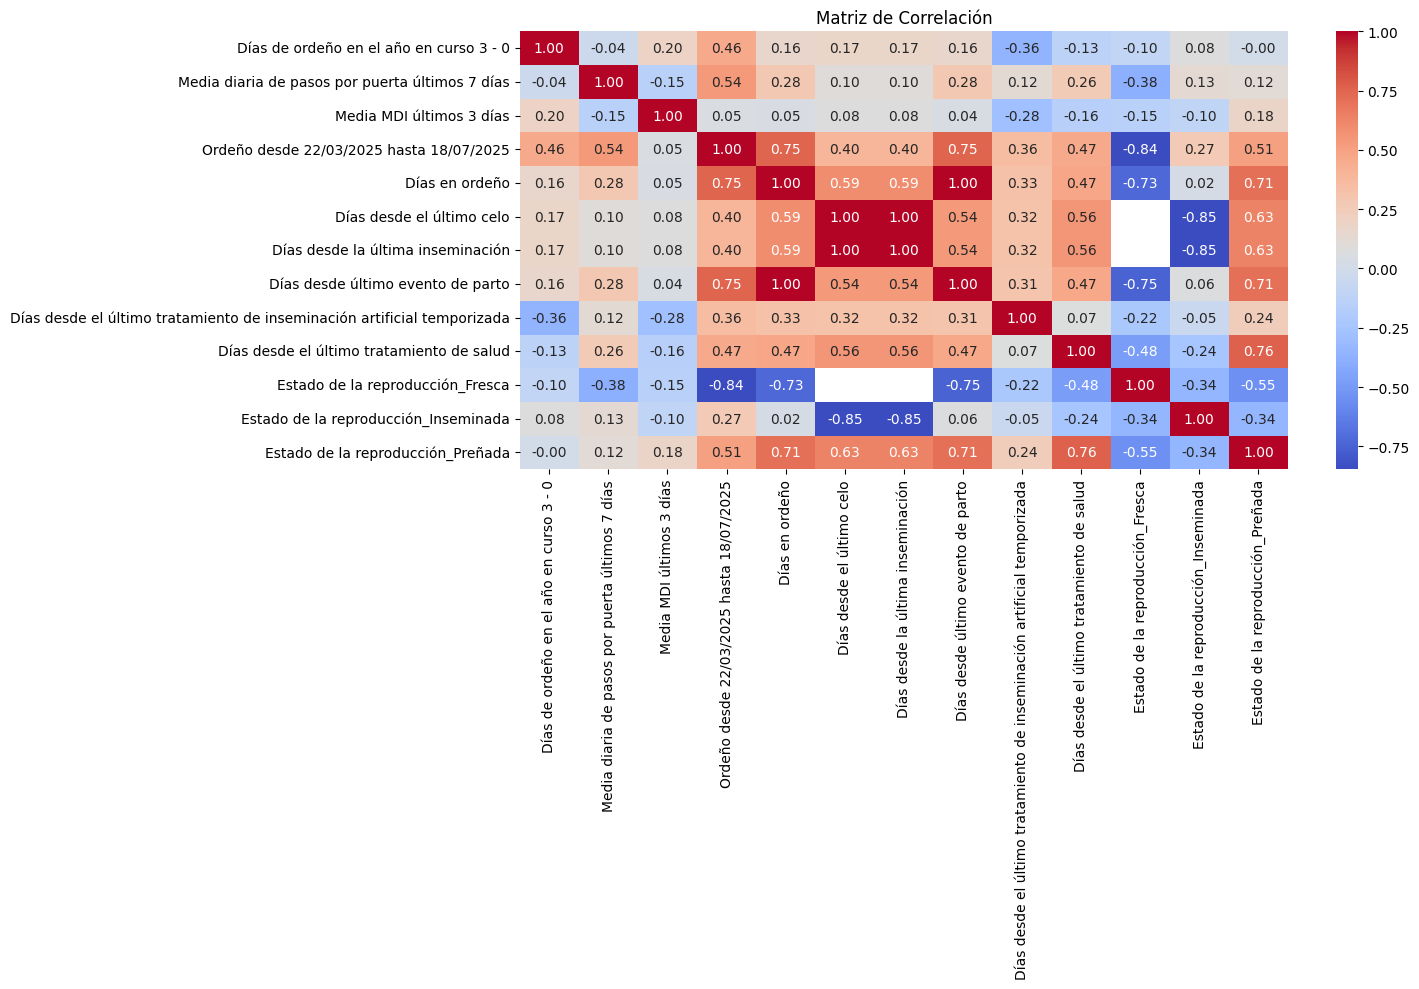

In [ ]:
# Identify columns that might contain comma-separated numbers
# Based on the error and the data inspection, 'Días desde el último tratamiento de inseminación artificial temporizada' is a candidate.
# We can also check other columns that are expected to be numeric.
cols_to_clean = ['Días desde el último tratamiento de inseminación artificial temporizada', 'Días desde el último tratamiento de vacunación'] # Add other potential columns if needed

for col in cols_to_clean:
    if col in df_reporte_clean.columns:
        # Convert to string to ensure replace works, then remove commas and convert to numeric
        df_reporte_clean[col] = df_reporte_clean[col].astype(str).str.replace(',', '', regex=False)
        # Convert to numeric, coercing errors will turn unconvertible values into NaN
        df_reporte_clean[col] = pd.to_numeric(df_reporte_clean[col], errors='coerce')


correlation_matrix = df_reporte_clean.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [ ]:
df_reporte_reduce = df_reporte_clean.drop(["Ordeño desde 22/03/2025 hasta 18/07/2025","Días desde último evento de parto", ], axis=1)
df_reporte_reduce.head()

,Días de ordeño en el año en curso 3 - 0,Media diaria de pasos por puerta últimos 7 días,Media MDI últimos 3 días,Días en ordeño,Días desde el último celo,Días desde la última inseminación,Días desde el último tratamiento de inseminación artificial temporizada,Días desde el último tratamiento de salud,Estado de la reproducción_Fresca,Estado de la reproducción_Inseminada,Estado de la reproducción_Preñada
0,NaN,10.00,1.34,100.0,14.0,14.0,NaN,9,False,True,False
1,31.0,9.71,1.06,298.0,201.0,201.0,NaN,274,False,False,True
2,31.0,3.43,2.10,264.0,166.0,166.0,NaN,108,False,False,True
3,14.0,11.57,1.09,255.0,93.0,93.0,1121.0,228,False,False,True
4,NaN,14.43,1.57,89.0,NaN,NaN,NaN,71,False,False,False


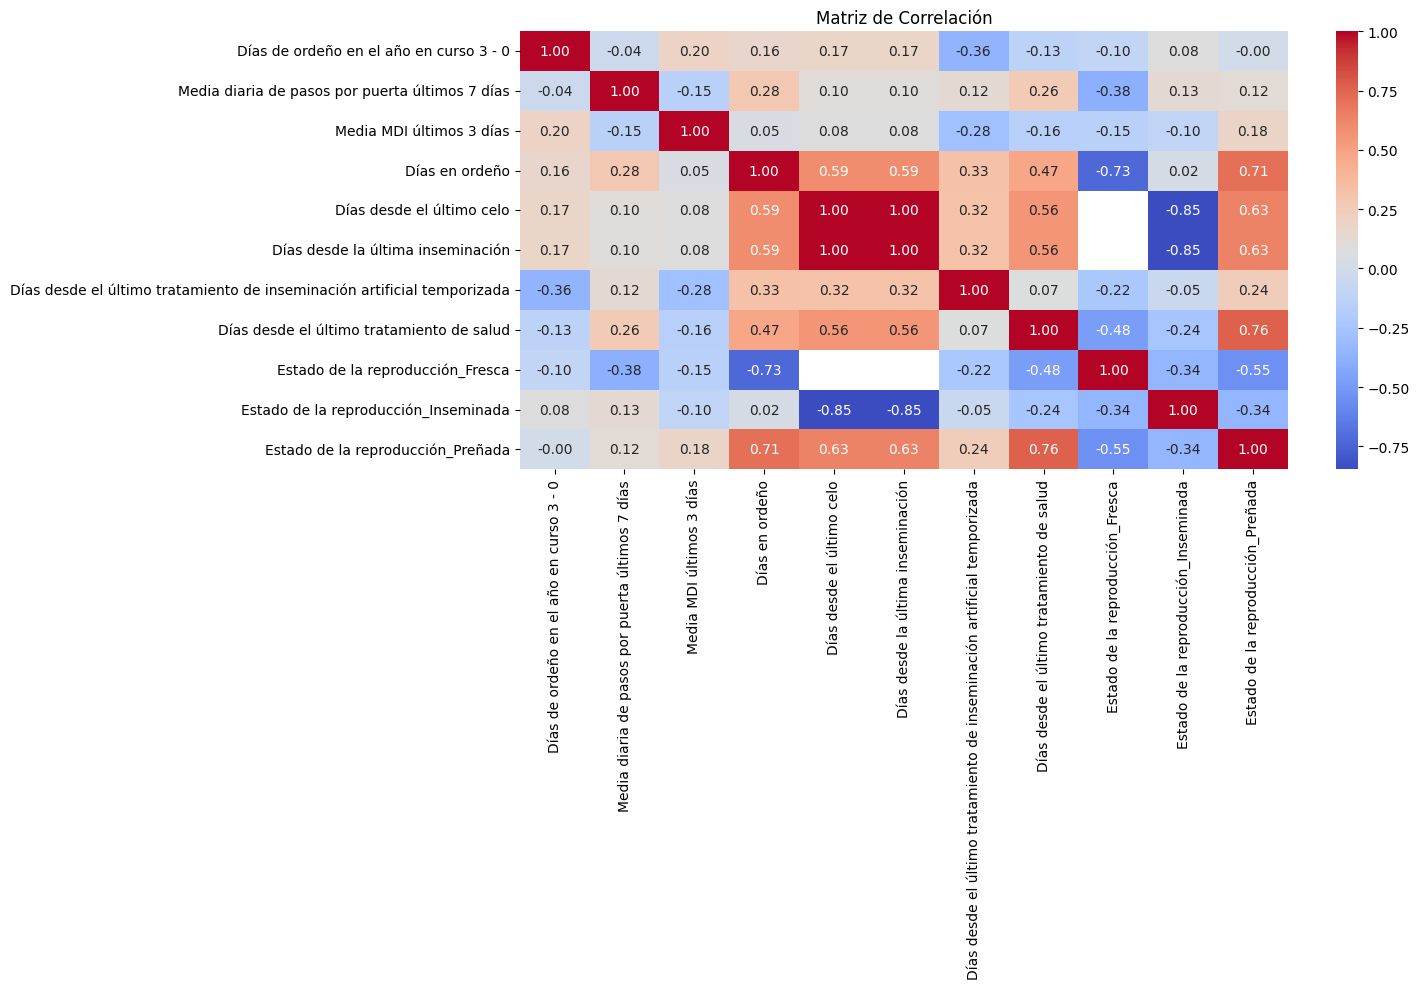

In [ ]:
correlation_matrix = df_reporte_reduce.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

##**Histograma de todas las columnas para la visualización de distribuciones**

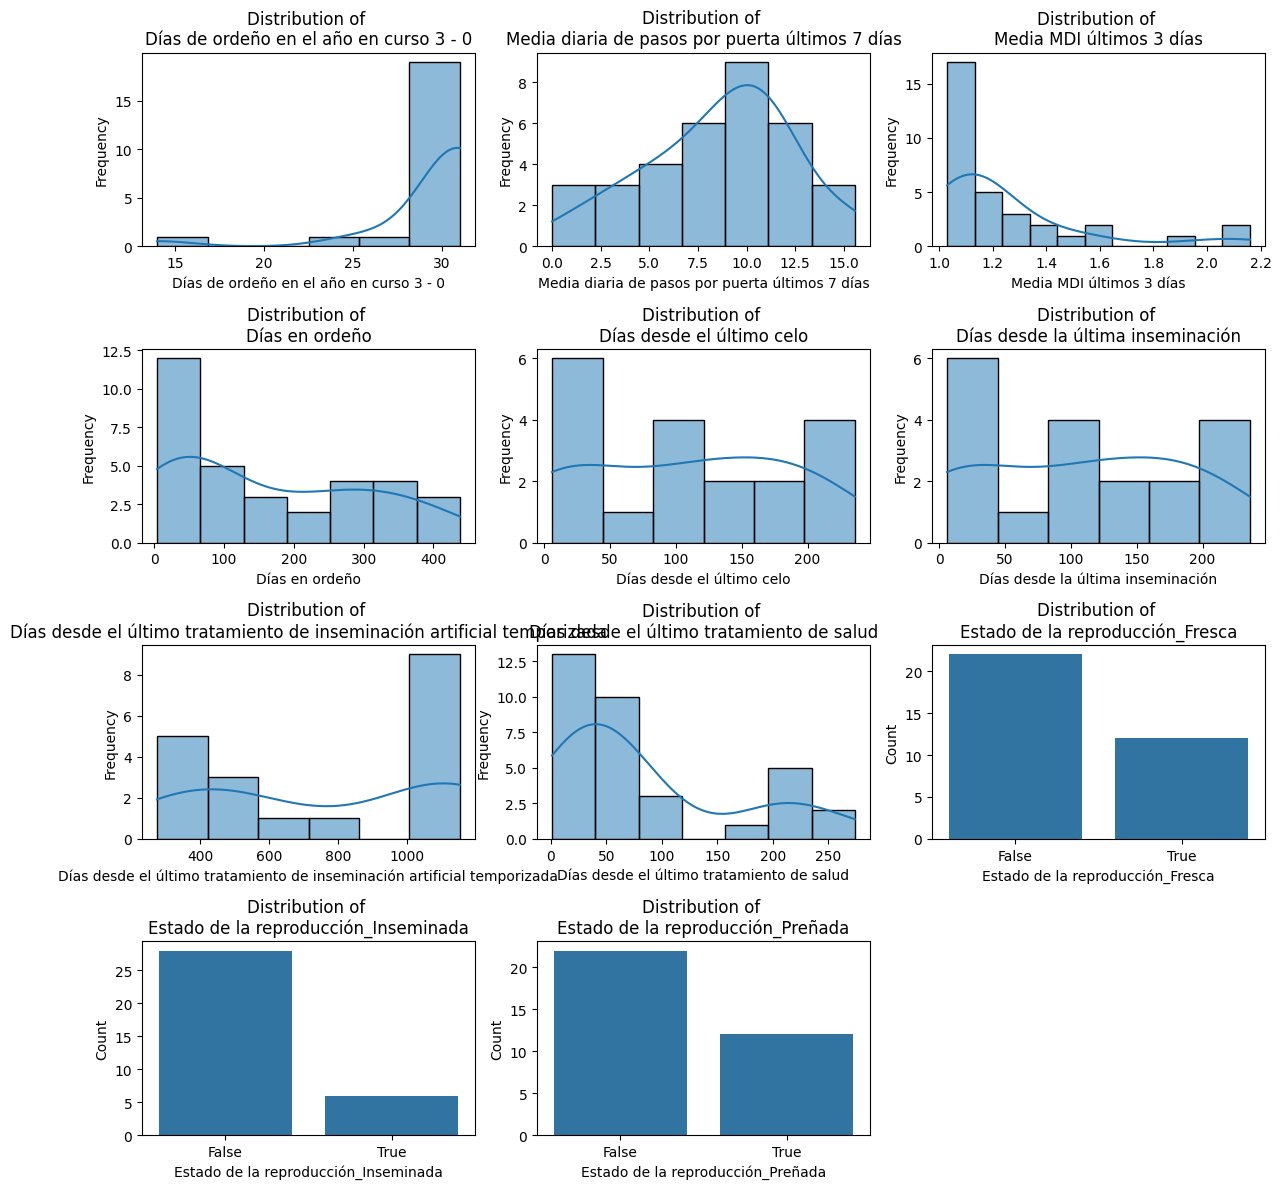

In [ ]:
# Get the list of columns from df_cleaned
columns_to_visualize = df_reporte_reduce.columns.tolist()

# Calculate the number of rows and columns for subplots
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(columns_to_visualize) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_visualize):
    if i < len(axes): # Ensure we don't go out of bounds if there are more columns than subplots
        if df_reporte_reduce[col].dtype in ['int64', 'float64']:
            # For numerical columns, use a histogram
            sns.histplot(df_reporte_reduce[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of \n{col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        else:
            # For other types (likely discrete/categorical), use a bar plot
            sns.countplot(x=col, data=df_reporte_reduce, ax=axes[i])
            axes[i].set_title(f'Distribution of \n{col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()